In [2]:
import ee
import geemap
import matplotlib.pyplot as plt
ee.Initialize(project= 'ee-gy5555386')


In [4]:
ee.Initialize(project= 'ee-gy5555386')

## example for loading statillate dataset and visualization

In [12]:
# load hassen dataset related with forest watch
dataset= ee.Image('UMD/hansen/global_forest_change_2020_v1_8')
forest_loss =dataset.select('loss')
forest_2000= dataset.select('treecover2000')

In [3]:
Map=geemap.Map()
global_region = ee.Geometry.Rectangle([-180,-90,180,90])

Map.centerObject(global_region,2)

loss_vis_params = {
    'min' : 0,
    'max' : 1,
    'palette' : ['red']
    }
forest_2000_vis_params = {
    'min':0,
    'max' : 100,
    'palette' : ['00FF00']
}

Map.addLayer(forest_loss,loss_vis_params, 'Forest Loss')
Map.addLayer(forest_2000, forest_2000_vis_params,'Forest Cover 2000')
Map

Map(center=[4.075891298132545e-31, 0], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=…

In [6]:
coco_image = ee.Image('projects/ee-gy5555386/assets/eth_cocoa_map')

In [9]:
# Define the region of interest (the entire image)
region = coco_image.geometry()

# Get the minimum and maximum values over the region
min_max = coco_image.reduceRegion(
    reducer=ee.Reducer.minMax(),
    geometry=region,
    scale=30,
    maxPixels=1e9
)

# Print the minimum and maximum values
print(min_max.getInfo())

{'b1_max': 1, 'b1_min': -32768}


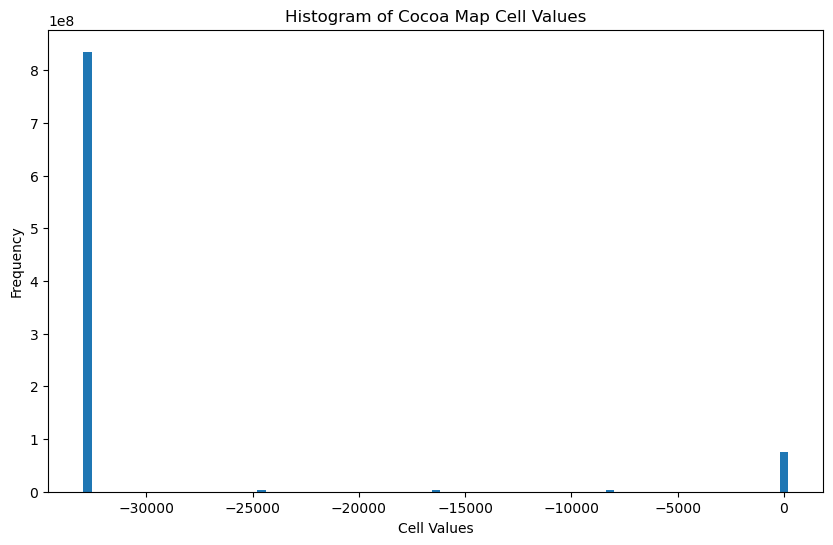

In [10]:
# Get the histogram of cell values
histogram = coco_image.reduceRegion(
    reducer=ee.Reducer.histogram(),
    geometry=region,
    scale=30,
    maxPixels=1e9
)

# Extract the histogram data
hist_data = histogram.getInfo()

# Extract the histogram values and bins
values = hist_data['b1']['histogram']
bins = hist_data['b1']['bucketMeans']

# Plot the histogram
plt.figure(figsize=(10, 6))
plt.bar(bins, values, width=bins[1] - bins[0], align='center')
plt.xlabel('Cell Values')
plt.ylabel('Frequency')
plt.title('Histogram of Cocoa Map Cell Values')
plt.show()

In [11]:
# Define visualization parameters
viz_params = {
    'min': -35000,
    'max': 0,
    'palette': ['grey', 'green']
}

# Add the image to the map
Map.addLayer(coco_image, viz_params, 'Cocoa Map')

# Center the map on the image
Map.centerObject(coco_image, 10)

# Display the map
Map

Map(bottom=804.0, center=[7.768716615400671, -3.7037323371880677], controls=(WidgetControl(options=['position'…

## overlay the cocoa map with forest layer

In [12]:
import geopandas

In [13]:
dataset.getInfo()



{'type': 'Image',
 'bands': [{'id': 'treecover2000',
   'data_type': {'type': 'PixelType',
    'precision': 'int',
    'min': 0,
    'max': 255},
   'dimensions': [1440000, 560000],
   'crs': 'EPSG:4326',
   'crs_transform': [0.00025, 0, -180, 0, -0.00025, 80]},
  {'id': 'loss',
   'data_type': {'type': 'PixelType',
    'precision': 'int',
    'min': 0,
    'max': 255},
   'dimensions': [1440000, 560000],
   'crs': 'EPSG:4326',
   'crs_transform': [0.00025, 0, -180, 0, -0.00025, 80]},
  {'id': 'gain',
   'data_type': {'type': 'PixelType',
    'precision': 'int',
    'min': 0,
    'max': 255},
   'dimensions': [1440000, 560000],
   'crs': 'EPSG:4326',
   'crs_transform': [0.00025, 0, -180, 0, -0.00025, 80]},
  {'id': 'lossyear',
   'data_type': {'type': 'PixelType',
    'precision': 'int',
    'min': 0,
    'max': 255},
   'dimensions': [1440000, 560000],
   'crs': 'EPSG:4326',
   'crs_transform': [0.00025, 0, -180, 0, -0.00025, 80]},
  {'id': 'first_b30',
   'data_type': {'type': 'Pixe

In [14]:

# 选择感兴趣的波段
band = dataset.select('treecover2000')

In [15]:
# 定义感兴趣区域（整个图像）
region = ee.Geometry.Rectangle([-180, -90, 180, 90])



In [16]:
# histogram visualization
histogram = band.reduceRegion(
    reducer=ee.Reducer.histogram(),
    geometry=region,
    scale=30,
    maxPixels=1e9
)



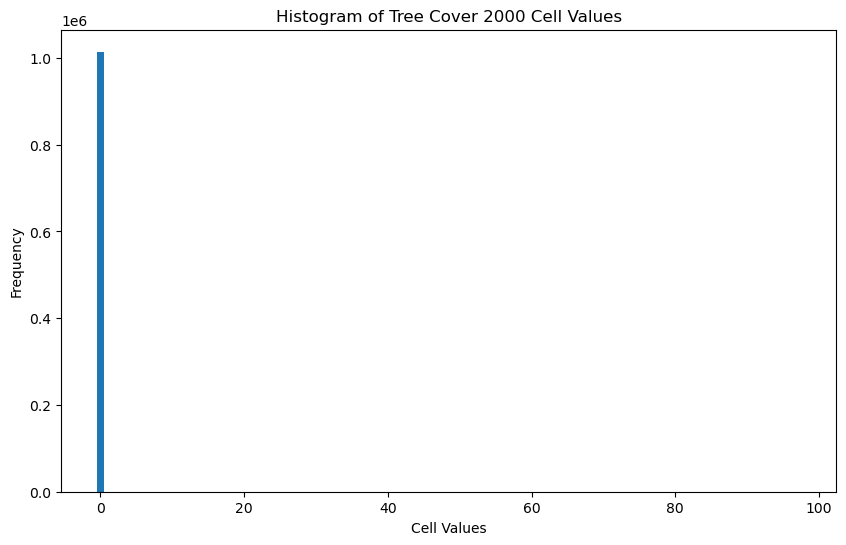

In [17]:
# data from histogram
hist_data = histogram.getInfo()
# 提
values = hist_data['treecover2000']['histogram']
bins = hist_data['treecover2000']['bucketMeans']

# 绘制直方图
plt.figure(figsize=(10, 6))
plt.bar(bins, values, width=bins[1] - bins[0], align='center')
plt.xlabel('Cell Values')
plt.ylabel('Frequency')
plt.title('Histogram of Tree Cover 2000 Cell Values')
plt.show()

In [18]:
Map1 = geemap.Map()
gfc2014 = ee.Image('UMD/hansen/global_forest_change_2015') 
Map1.addLayer(gfc2014)
gfc2014.getInfo()

{'type': 'Image',
 'bands': [{'id': 'treecover2000',
   'data_type': {'type': 'PixelType',
    'precision': 'int',
    'min': 0,
    'max': 255},
   'dimensions': [1440000, 548000],
   'crs': 'EPSG:4326',
   'crs_transform': [0.00025, 0, -180, 0, -0.00025, 80]},
  {'id': 'loss',
   'data_type': {'type': 'PixelType',
    'precision': 'int',
    'min': 0,
    'max': 255},
   'dimensions': [1440000, 548000],
   'crs': 'EPSG:4326',
   'crs_transform': [0.00025, 0, -180, 0, -0.00025, 80]},
  {'id': 'gain',
   'data_type': {'type': 'PixelType',
    'precision': 'int',
    'min': 0,
    'max': 255},
   'dimensions': [1440000, 548000],
   'crs': 'EPSG:4326',
   'crs_transform': [0.00025, 0, -180, 0, -0.00025, 80]},
  {'id': 'lossyear',
   'data_type': {'type': 'PixelType',
    'precision': 'int',
    'min': 0,
    'max': 255},
   'dimensions': [1440000, 548000],
   'crs': 'EPSG:4326',
   'crs_transform': [0.00025, 0, -180, 0, -0.00025, 80]},
  {'id': 'first_b30',
   'data_type': {'type': 'Pixe

In [19]:
Map1.addLayer(gfc2014, {'bands': ['loss']}, 'loss') 
Map1.addLayer(gfc2014, {'bands': ['last_b50', 'last_b40', 'last_b30']}, 'false color')
Map1.addLayer(gfc2014, {'bands': ['loss', 'treecover2000', 'gain']}, 'green') 
Map1.addLayer(gfc2014, {'bands': ['loss', 'treecover2000', 'gain'],max: [1, 255, 1]}, 'forest cover, loss, gain') 
Map1.addLayer(gfc2014, {'bands': ['treecover2000'],'palette': ['000000', '00FF00']}, 'forest cover palette')
Map1.addLayer(gfc2014, {'bands': ['treecover2000'],'palette': ['000000', '00FF00'],max: 100}, 'forest cover percent')
Map1

Map(center=[0, 0], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=SearchDataGUI(childr…

In [20]:
loss2015 =  gfc2014.select(['loss']) 
# Filter the 'loss' band to include only pixels where loss has occurred
loss2015 = loss2015.updateMask(loss2015)
lossyear = gfc2014.select(['lossyear'])

In [21]:
region = ee.Geometry.Polygon(
    [[[-3.255, 11.174],
      [-3.255, 4.710],
      [1.202, 4.710],
      [1.202, 11.174]]])
# Get the min and max values for the specified region
stats = loss2015.reduceRegion(
    reducer=ee.Reducer.minMax(),
    geometry=region,
    scale=30,  # Adjust the scale as needed
    maxPixels=1e11
)
# Print the results
print('Min and Max values:', stats.getInfo())

Min and Max values: {'loss_max': 1, 'loss_min': 1}


In [22]:
Map2= geemap.Map()
loss2015 =  gfc2014.select(['loss']) 
# Define visualization parameters
vis_params = {
    'min': 0,
    'max': 1,
    'palette': ['blue', 'yellow']
}

# Add the layer to the map
Map2.addLayer(loss2015, vis_params, 'Forest Loss 2015')

# Center the map on Ghana
Map2.setCenter(-1.0232, 7.9465, 6)  # Longitude, Latitude, Zoom level

# Display the map
Map2

Map(center=[7.9465, -1.0232], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=SearchDat…

##calculate the loss area for Gahna , the tree loss area is 10482987027.122002

In [25]:
pixelArea = ee.Image.pixelArea()
lossArea2015 = loss2015.multiply(pixelArea)
region = ee.Geometry.Polygon(
    [[[-3.255, 11.174],
      [-3.255, 4.710],
      [1.202, 4.710],
      [1.202, 11.174]]])
# Sum the area of forest loss within the region
totalLossArea = lossArea2015.reduceRegion(
    reducer=ee.Reducer.sum(),
    geometry=region,
    scale=30,
    maxPixels=1e9
)
# Print the result
print('Total forest loss area in 2015 (square meters):', totalLossArea.getInfo())

Total forest loss area in 2015 (square meters): {'loss': 10482987027.122002}


## example for Gahana

In [26]:
# Mask the loss image to the Ghana region
loss2015_ghana = loss2015.clip(region)
# Define visualization parameters
vis_params = {
    'min': 0,
    'max': 1,
    'palette': ['blue', 'yellow']
}
# Create a map
Map3 = geemap.Map()
Map3.addLayer(loss2015_ghana, vis_params, 'Forest Loss 2015 in Ghana')
Map3

Map(center=[0, 0], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=SearchDataGUI(childr…

## calculate the forest loss area for Gahna per year

In [205]:
# Mask the lossyear image to the Ghana region
lossyear_ghana = lossyear.clip(region)
# Calculate the pixel area
pixelArea1 = ee.Image.pixelArea()
# Function to calculate the area of loss for a specific year
def calculate_loss_area(year):
    loss_for_year = lossyear_ghana.eq(year)
    loss_area_for_year = loss_for_year.multiply(pixelArea1)
    total_loss_area = loss_area_for_year.reduceRegion(
        reducer=ee.Reducer.sum(),
        geometry=region,
        scale=30,
        maxPixels=1e9
    )
    return total_loss_area.getInfo()
# Calculate the loss area for each year from 2001 to 2014
loss_areas = {}
for year in range(1, 15):  # Years 2001 to 2014
    loss_areas[2000 + year] = calculate_loss_area(year)
  # Sum the loss areas per year
total_loss_area_per_year = {year: area['lossyear'] for year, area in loss_areas.items()}  
# Print the results
for year, area in total_loss_area_per_year.items():
    print(f'Total forest loss area in {year} (square meters):', area)
    
# test for the sum of the loss areas per year
# Sum the total loss area across all years
sum_total_loss_area = sum(total_loss_area_per_year.values())

# Print the sum of the total loss area
print(f'Sum of total forest loss area from 2001 to 2014 (square meters):', sum_total_loss_area) 

Total forest loss area in 2001 (square meters): 666196226.5097202
Total forest loss area in 2002 (square meters): 1010383126.6102903
Total forest loss area in 2003 (square meters): 397586165.55287486
Total forest loss area in 2004 (square meters): 312438828.96695364
Total forest loss area in 2005 (square meters): 659156544.8214135
Total forest loss area in 2006 (square meters): 524711154.2089425
Total forest loss area in 2007 (square meters): 684454407.1023227
Total forest loss area in 2008 (square meters): 728698852.9987943
Total forest loss area in 2009 (square meters): 774199470.6960809
Total forest loss area in 2010 (square meters): 392341946.8413749
Total forest loss area in 2011 (square meters): 586655630.0542043
Total forest loss area in 2012 (square meters): 607134124.5374718
Total forest loss area in 2013 (square meters): 1598018641.4055896
Total forest loss area in 2014 (square meters): 1541008586.2604527


In [210]:
# Get the projection of the loss2015 image
loss2015_proj = loss2015.projection()

# Reproject the coco_image to match the resolution of loss2015
coco_image_reprojected = coco_image.reproject(loss2015_proj)

# Overlay the reprojected coco_image with loss2015
overlay = loss2015.addBands(coco_image_reprojected)

# Print the result to check
print('Overlay result:', overlay.getInfo())

Overlay result: {'type': 'Image', 'bands': [{'id': 'loss', 'data_type': {'type': 'PixelType', 'precision': 'int', 'min': 0, 'max': 255}, 'dimensions': [1440000, 548000], 'crs': 'EPSG:4326', 'crs_transform': [0.00025, 0, -180, 0, -0.00025, 80]}, {'id': 'b1', 'data_type': {'type': 'PixelType', 'precision': 'int', 'min': -32768, 'max': 32767}, 'dimensions': [39166, 27257], 'origin': [685602, 275298], 'crs': 'EPSG:4326', 'crs_transform': [0.00025, 0, -180, 0, -0.00025, 80]}], 'version': 1641990738307055, 'id': 'UMD/hansen/global_forest_change_2015', 'properties': {'system:visualization_0_min': '0.0', 'type_name': 'Image', 'keywords': ['forest', 'geophysical', 'hansen', 'landsat_derived', 'umd'], 'thumb': 'https://mw1.google.com/ges/dd/images/UMD_hansen_thumb.png', 'description': '<p>Results from time-series analysis of Landsat images in characterizing\nglobal forest extent and change.</p><p>The &#39;first&#39; and &#39;last&#39; bands are reference multispectral imagery from the\nfirst and

## Check if two layers has the same crs and transforms

In [220]:
# Get the projection of the loss2015 image
loss2015_proj = loss2015.projection()
# Get the projection of the coco_image
coco_image_proj = coco_image.projection()

# Extract CRS and transform parameters
loss2015_crs = loss2015_proj.crs()
loss2015_transform = loss2015_proj.transform()

coco_image_crs = coco_image_proj.crs()
coco_image_transform = coco_image_proj.transform()

# Check if the CRS and transform parameters are the same
same_crs = loss2015_crs.getInfo() == coco_image_crs.getInfo()
same_transform = loss2015_transform.getInfo() == coco_image_transform.getInfo()

# Check if both CRS and transform are the same
same_resolution = same_crs and same_transform

# Print the result
print('Do the images have the same resolution?', same_resolution)

Do the images have the same resolution? False


## example code for spatial analysis

In [ ]:
## check info for the large spatial dataset